# Human Pose Estimation
* Human pose estimation은 크게 2D와 3D로 나누어지는데 2D HPE는 2D 이미지에서 (x,y) 2차원 좌표들을 찾아내고, 3D HPE는 2D 이미지에서 (x,y,z) 3차원 좌표들을 찾아내는 기술이다.
* 사람의 몸은 3D 환경에서 제약이 있기 때문에 이러한 조건을 이용해서 2D에서 3D 이미지를 복원한다.
* 2차원 이미지에서 3차원 이미지를 복원하는 것은 카메라 행렬에서 (x,y,z) real world 좌표가 이미지 (u,v) 좌표계로 표현될 때 z축(거리) 정보가 소실되기 때문이다.

## 1. Face Landmark vs Pose Estimation
* 2D pose estimation은 face landmark와 매우 비슷하다. 하지만 face landmark는 물리적으로 거의 고정되어 있는 반면, human pose는 팔, 다리가 상대적으로 넓은 범위와 자유도를 갖는다.
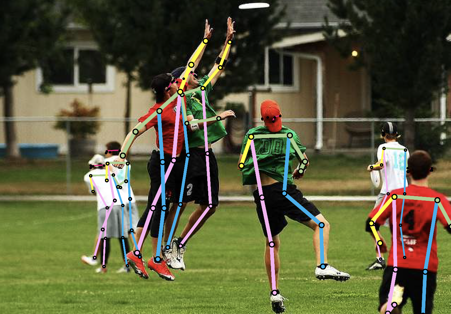
* 높은 자유도로 인해 데이터 분포를 특정하기 어렵다 -> 학습에 더 많은 데이터가 필요하고, 더 복잡한 모델을 사용해야 한다.

### Pose Estimation 접근법 (1) Top-down
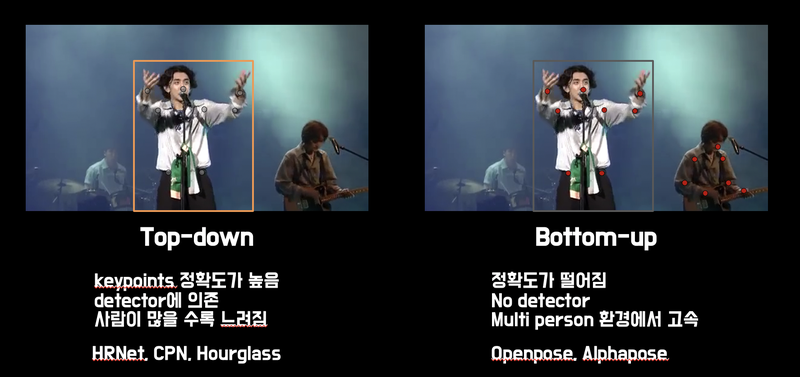
* 모든 사람의 정확한 keypoint를 찾기 위해 object detection을 사용한다.
* crop한 이미지 내에서 keypoint를 찾아내는 방법으로 표현한다.
* detector가 선행되어야 하고 모든 사람마다 알고리즘을 적용해야 하기 때문에 사람이 많이 등장할 때는 느리다는 단점이 있다.

### Pose Estimation 접근법 (2) Bottom-up
* detector가 없고, keypoint를 먼저 검출한다. 예를들어 손목에 해당하는 모든 점들을 검출한다.
* 한 사람에 해당하는 keypoint를 clustering한다.
* detector가 없기 때문에 다수의 사람이 영상에 등장하더라도 속도 저하가 크지 않다. 반면 top down 방식에 비해 keypoint 검출 범위가 넓어 성능이 떨어진다.

## 2. Human keypoint detection
* human pose estimation은 keypoint의 localization 문제를 푼다는 점에서 비슷하지만 손목, 팔꿈치 등의 joint keypoint 정보는 얼굴의 keypoint보다 훨씬 다양한 위치와 변화를 보인다.
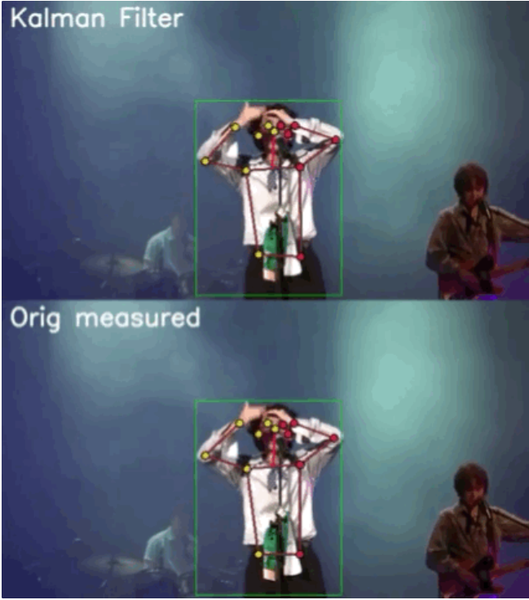
* 손이 얼굴을 가리는 행위, 모든 keypoint가 영상에 담기지 않는 등 invisible, occlusioins, clothing, lighting change가 face landmark에 비해 더 어려운 환경을 만들어 낸다.
### (1) 딥러닝 적용 이전
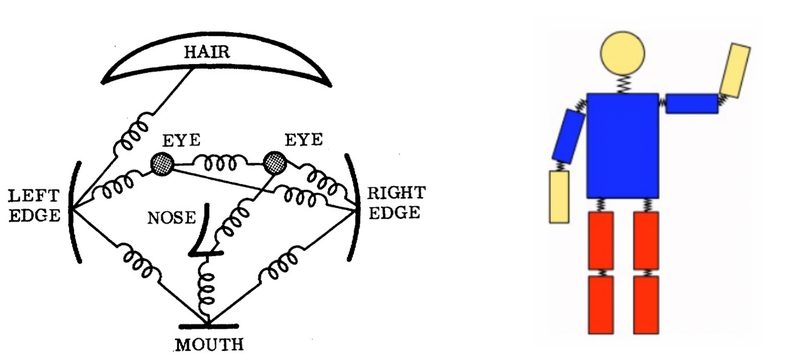
* '인체는 변형 가능 부분으로 나누어져 있고 각 부분끼리 연결성을 가지고 있다.'라는 아이디어를 기반으로 인간의 몸이 가진 제약조건을 위 그림에 보이는 스프링으로 표현했다.
* 3D 환경에서는 좋은 방법일 수 있으나, 2D 이미지 데이터에서는 촬영각도에 따라 팔이 다리 옆에서 관찰될 수도 있다.
* 이런 문제를 해결하기 위해 Deformable part models 방법에서는 각 부분(part) 들의 complex joint relationship의 mixture model로 keypoint를 표현하는 방법을 이용했지만 성능은 기대에 미치지 못했다.

### (2) DeepPose
* 전통적 pose estimation 모델이 연산 효율 및 성능이 떨어지는 것에 비해, AlexNet 이후, 다양한 분야에 CNN이 적용되면서 pose estimation 분야에도 CNN을 이용한 방법이 나타나기 시작했다.
* [Toshev and Szegedy의 딥러닝 기반 keypoint localization 모델](https://arxiv.org/pdf/1312.4659.pdf)
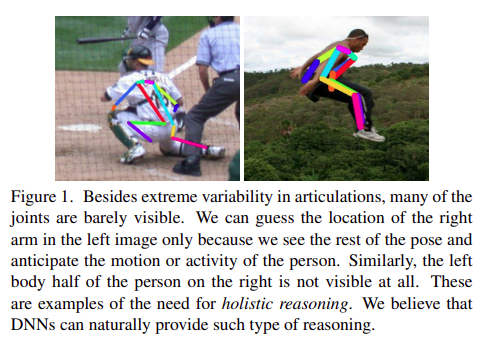
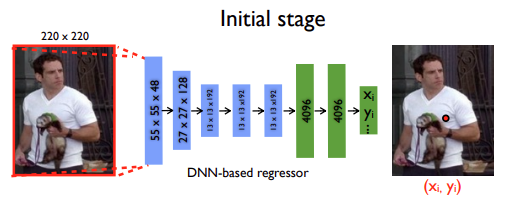
* 초기의 pose estimatioin 모델은 x,y좌표를 직접적으로 예측하는 position regression 문제로 인식했다.
* human detection을 통한 crop된 사람 이미지를 이용해서 딥러닝 모델에 입력하고 (x,y) 좌표를 출력하도록 만든다.
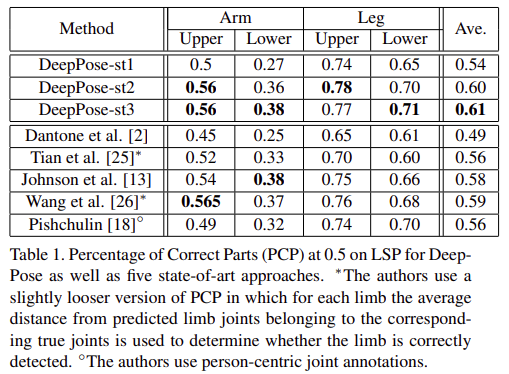
* 성능을 비약적으로 향상시켰다고 말하기는 어렵다.

### (3) Efficient Object Localization Using Convolution Network
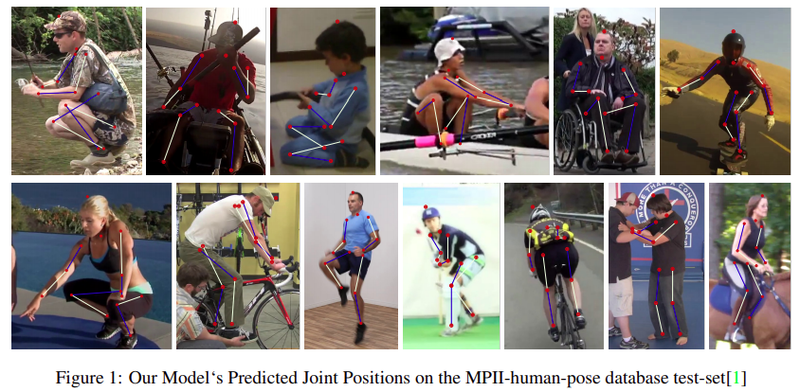
* keypoint의 위치를 직접 예측하기보다 keypoint가 존재할 확률 분포를 학습하게 하자는 아이디어를 사용한 논문이다.
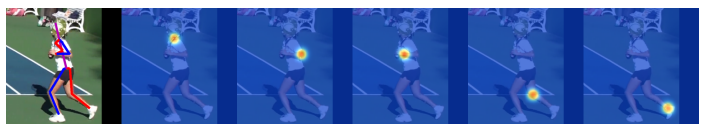
* human pose(keypoint)도 사람이 labeling을 할 수밖에 없는데 사람이 항상 같은 위치의 점을 찍을 수 있을까? 라는 물음에 keypoint를 직접 예측하는게 아닌 확률붑ㄴ포를 학습하게 하는 것이다.
* 자연상태에서 일어나는 확률 분포는 가우시안 분포일 가능성이 크다.
* 이런 점에 착안하여 label을 (x,y) 좌표에서 (x,y)를 중심으로 하는 heatmap으로 변환했다. 딥러닝 모델은 이런 heatmap을 학습하게 되는 것이다.
* 'keypoint가 존재할 확률'을 학습하게 된 이후로 성능이 비약적으로 향상되었다.
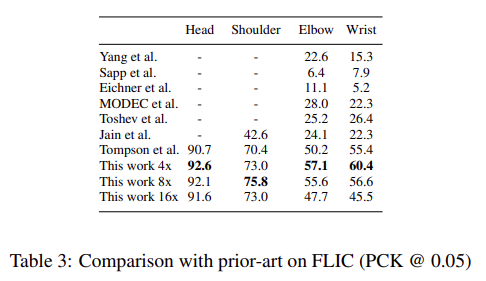
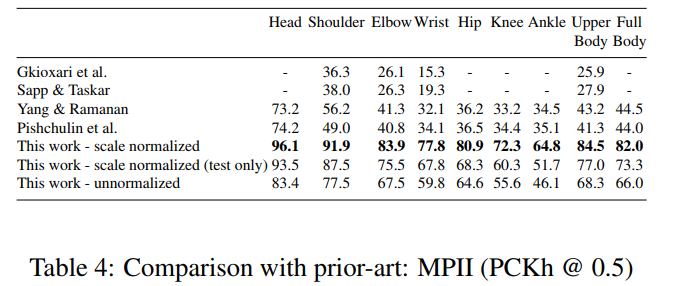
* [Efficient Object Localization Using Convolution Networks](https://arxiv.org/pdf/1411.4280.pdf)
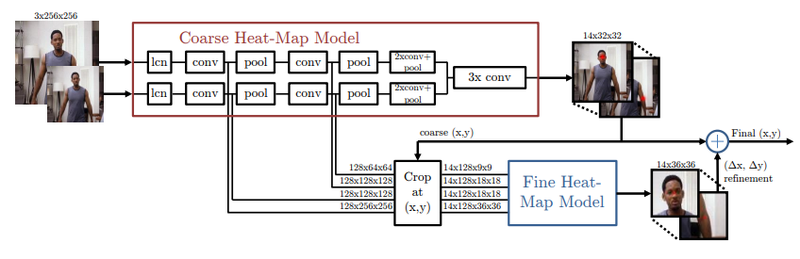

### (4) Convolution Pose Machines
* completely differentiable한 multi-stage 구조를 제안한 CPM
* multi stage 방법들은 DeepPose에서부터 지속적으로 사용되어 왔지만 crop연산 등 비연속적인 미분 불가능한 stage단위로 나눠져 있었기 때문에 학습 과정을 여러 번 반복하는 비효율적인 방법을 사용해 왔다.
[Convolution Pose Machines](https://arxiv.org/pdf/1602.00134.pdf)
* CPM은 end-to-end로 학습할 수 있는 모델을 제안한다.
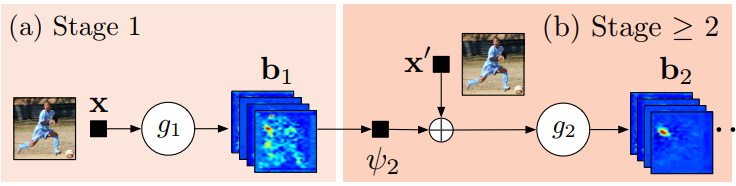
* Stage1 은 image feature를 계산하는 역할을 하고, stage2는 keypoint를 예측하는 역할을 한다.
* g1과 g2 모두 heatmap을 출력하게 만들어서 재사용이 가능한 부분은 weight sharing할 수 있도록 세부 모델을 설계했다.
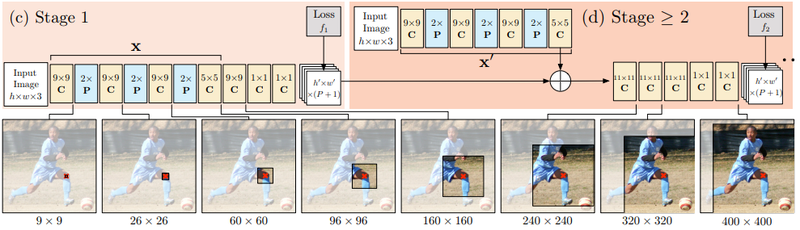
* Stage ≥ 2 에서 볼 수 있듯이 stage2 이상부터는 반복적으로 사용할 수 있다.
* 보통 3개의 스테이지를 사용한다.
* stage1의 구조는 고정이고 stage2 부터는 stage2 구조를 반복해서 추론한다.
* stage2부터는 입력이 heatmap(image feature)이 되기 때문에 stage단계를 거칠수록 keypoint가 refinement되는 효과를 볼 수 있다.
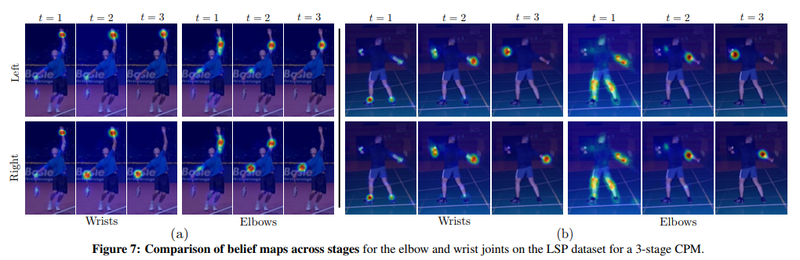
* Multi-stage 방법을 사용해 end-to-end로 학습이 가능하다고 해도 그대로 학습하는 경우는 높은 성능을 달성하기 어려워 stage단위로 pretraining을 한 후 다시 하나의 모델로 합쳐서 학습한다.
* 실제로 사용하기에는 매우 불편한 요소이다.
* CPM을 다루는 이유는 성능 때문이다. receptive field를 넓게 만드는 multi stage refinement 방법이 성능 향상에 크게 기여한 것 같다.
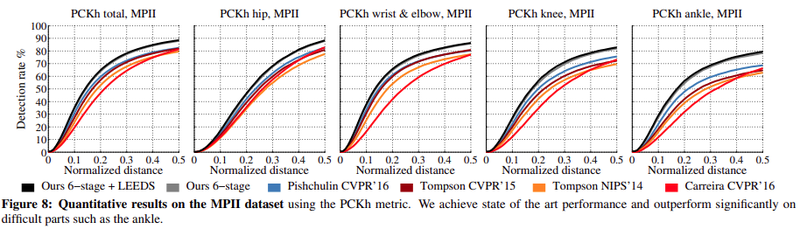
* 주황색 실선이 Tompson 알고리즘이다. CPM에서 제안한 검은색, 회색 실선이 detection rate에서 유의미한 차이를 보이고 있는 것을 볼 수 있다.

### (5) Stacked Hourglass Network
* [Stacked Hourglass Networks for Human Pose Estimation](https://arxiv.org/pdf/1603.06937.pdf)
#### Hourglass
* Stacked Hourglass Network의 기본 구조는 모대시계 같은 모양으로 만들어져 있다.
* Conv Layer와 Pooling으로 이미지(또는 feature)를 인코딩하고 upsampling layer를 통해 feature map의 크기를 키우는 방향으로 decoding한다. feature map 크기가 작아졌다 커지는 구조여서 hourglass라고 표현한다.
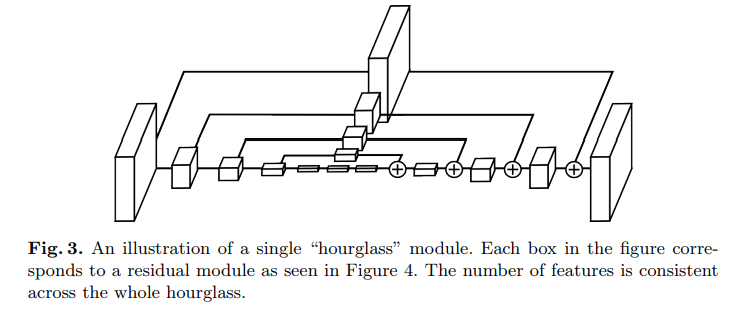
* 기존 방법들과의 가장 큰 차이점은 다음과 같다
  1. feature map upsampling
  2. residual connection
* pooling으로 image의 global feature를 찾고 upsampling으로 local feature를 고려하는 아이디어가 hourglass의 핵심 novelty라고 할 수 있다.
* hourglass의 모델 구조는 U-Net과 비슷하다.
* hourglass는 이 간단한 구조를 여러 층으로 쌓아올려서 human pose estimation의 성능을 향상시켰다.
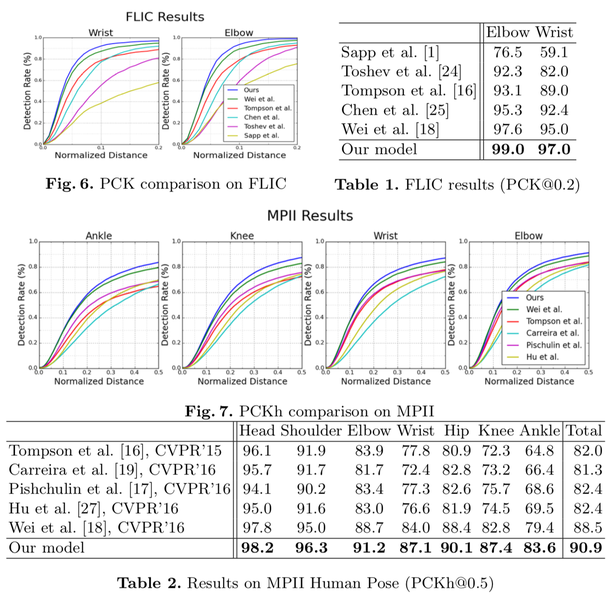

### (6) SimpleBaseline
* 앞서 소개한 연구들은 딥러닝 기반의 2D human pose estimation이 어떻게 발전해 왔는지를 보여준다.
* (x,y)를 직접 regression하는 방법이 heatmap 기반으로 바뀌고 모델의 구조가 바뀌어 가면서 encoder-decoder가 쌓아져 가는 형태가 완성되었다.
* 하지만 그간 발전한 현재의 간단한 모델의 성능은 어떨까? 라는 궁금증으로 만든 [SimpleBaseline](https://arxiv.org/pdf/1804.06208.pdf)의 저자는 아주 간단한 encoder-decoder 구조를 설계한다.
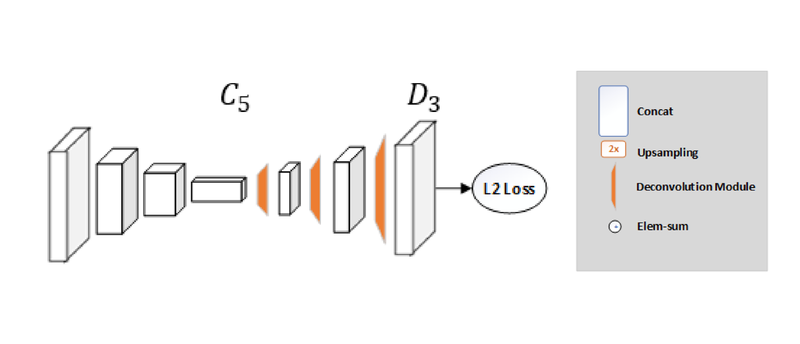
* 이 구조로 기존의 모델보다 더 높은 결과를 달성한다.
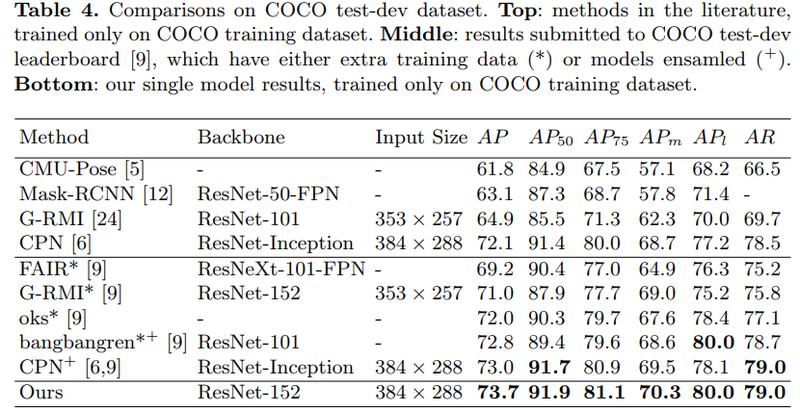
* hourglass와 직접 비교해보면 다음과 같은 결과가 나온다.
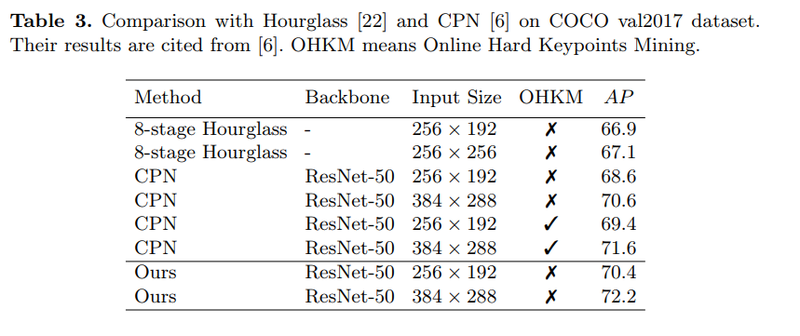

### (7) Deep High-Resolution Network(HRNet)
* [HRNet](https://arxiv.org/pdf/1902.09212.pdf)은 개발된 이후 현재까지도 SOTA에 가까운 성능을 보일 정도로 성능이 좋은 알고리즘이다.
* Stack hourglass, Cascaded pyramid network 등은 multi-stage구조로 이루어져 있어서 학습&추론 속도가 느리다는 단점이 있다.(대신 하이퍼파라미터를 최적화할 경우 1-stage 방법보다 성능이 좋다)
* 반면 Simplebaseline과 HRNet은 간단함을 추구하는 만큼 1-stage를 고수한다. 덕분에 구조도 간결해지고 사용하기도 쉽다.
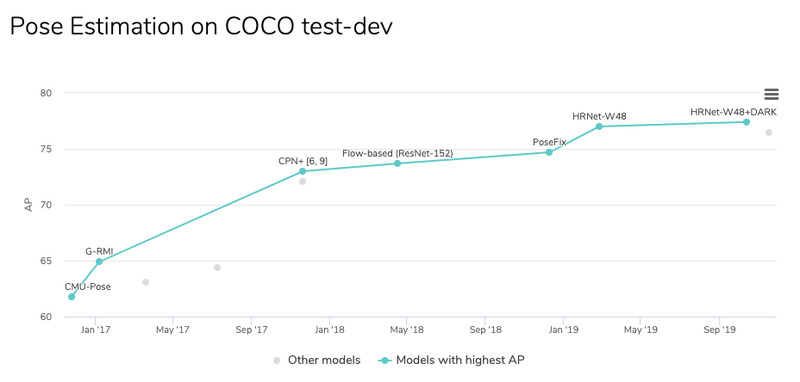
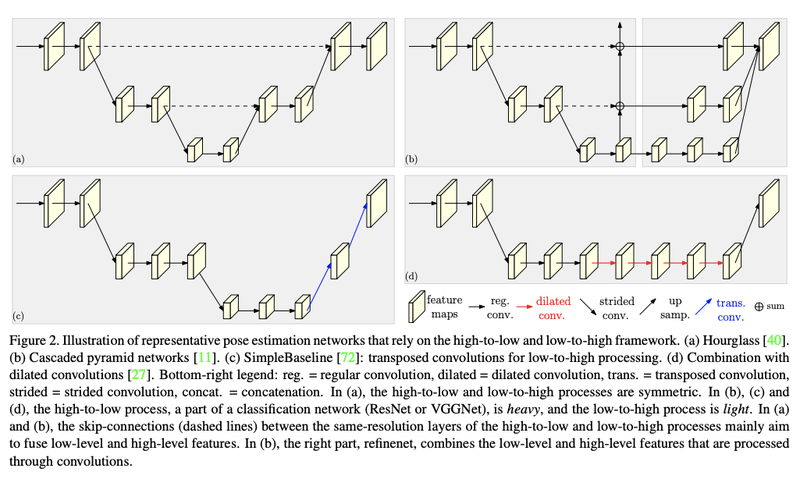
(a) Hourglass
(b) CPN(cascaded pyramid networks)
(c) SimpleBaseline - transposed conv
(d) SimpleBaseline - dilated conv
